## Data Mining - Practical Session

In this session you will be taken trhough the process of training a machine learning model to predict whether persons died in the Titanic cathastrophy. 

To this end, we will undergo the following steps:
* Load the data
* Explore the data
* Pre-process the data
* Define and gather interesting features
* Create a machine learning model
* Train it
* Evaluate it

Let's get to it! 

#### 1. Load The Data

First, we'll load the data.

In [1]:
# Import packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting library

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Get the data
# Important! Remeber to put the data ('train.csv', 'test.csv')
# in this folder

# Training data
train_data = pd.read_csv("data/train.csv") # Load the data
train_data.head() # Visualize first rows. 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Test data
test_data = pd.read_csv("data/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Voila, the data is now loaded! 

**Question 1: How big are the datasets?**

In [5]:
length_train_data = 0
length_test_data = 0

# Answer here

print(f"The training and test data are respectively of size {length_train_data} and {length_test_data}.")

The training and test data are respectively of size 0 and 0.


#### 2. Explore The Data

Now the data is loaded, we can start to play with it. Let's explore the data and understand what is being saved.

**Question 2: What features do we have in the dataset?**<br>
(Hint) Use google to figure out what they mean

#### 2.1. Explore The Data - Plot Interesting Relationships

As we saw in the first part of the lecture (and the film), correlations can be used to predict the probability of a certain person surviving the accident.

For instance, in the movie we saw that women and children were allowed to go first in the saving boats, but... was this really the case? **Let's figure it out!**

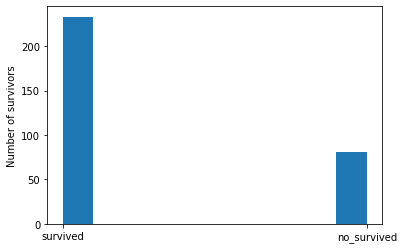

% of women who survived: 0.7420382165605095


In [6]:
# What's the percentage of women surviving the accident? 

# locate in the train data rows whose sex is female,
# and then filter the column 'Survived'
women = train_data.loc[train_data.Sex == 'female']["Survived"] 

# Statistics of women
women_hist_data = women.copy()
women_hist_data = women_hist_data.replace(0, 'no_survived')
women_hist_data = women_hist_data.replace(1, 'survived')

# plot in a a histogram
plt.figure()
plt.hist([women_hist_data], align=('mid'))
plt.ylabel('Number of survivors')
plt.show()

# Get the rate of women that survived
print("% of women who survived:", sum(women)/len(women))

It seems that indeed most of the women survived.

**Question 3: Repeat the same procedure for children, i.e., people with age <= 18.**

In [7]:
# Answer here


Oh... apparently, it was not advantageous to be a child during the accident.<br>
Maybe was it due to the amount of money they paid for the rid? Let's check that out.

139
70


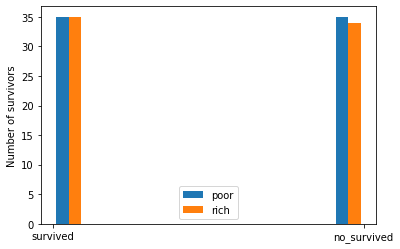

In [7]:
#Let's divide the children in two equal groups. 
# 1st. The helft with the lowest ticket price
# 2nd. The helft with the highest ticket price

print(len(train_data.loc[train_data.Age <= 18]['Survived'])) #Total # children
print(len(train_data.loc[train_data.Age <= 18].loc[train_data.Fare <= 20.5])) # Fare of 20.5 separates the groups in half.

poor_children = train_data.loc[train_data.Age <= 18].loc[train_data.Fare <= 20.5]['Survived']
poor_children = poor_children.replace(0, 'no_survived')
poor_children = poor_children.replace(1, 'survived')

rich_children = train_data.loc[train_data.Age <= 18].loc[train_data.Fare > 20.5]['Survived']
rich_children = rich_children.replace(0, 'no_survived')
rich_children = rich_children.replace(1, 'survived')

# plot in a a histogram
plt.figure()
plt.hist([poor_children, rich_children], align=('mid'), label=['poor', 'rich'])
plt.ylabel('Number of survivors')
plt.legend()
plt.show()

Apparently, it does not lie on the ticket fare. Perhaps it was due to the extreme weather.

**Question 4: Which properties are relevant to predict survival?**<br>
Now, we leave it up to you, what features do you think can be used as good predictors for the survival of passengers? 

Here we provide an example based on the sex:

139
70


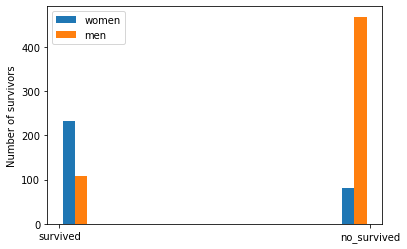

In [8]:
#Let's divide the passengers by sex. 
print(len(train_data.loc[train_data.Age <= 18]['Survived'])) #Total # children
print(len(train_data.loc[train_data.Age <= 18].loc[train_data.Fare <= 20.5])) # Fare of 20.5 separates the groups in half.

women = train_data.loc[train_data.Sex == 'female']["Survived"]
women = women.replace(0, 'no_survived')
women = women.replace(1, 'survived')

men = train_data.loc[train_data.Sex == 'male']["Survived"]
men = men.replace(0, 'no_survived')
men = men.replace(1, 'survived')

# plot in a a histogram
plt.figure()
plt.hist([women, men], align=('mid'), label=['women', 'men'])
plt.ylabel('Number of survivors')
plt.legend()
plt.show()

In [9]:
# answer here:



#### 3. Pre-process the Data

#### 3.1. Missing values

Unfortunately, the data we are provided is often not perfect. For instance, the dataset contains several 'NaN's (not-a-number) or missing values: 

In [10]:
train_data.isna().sum() # Isna() provides a True if the value is a NaN. With the sum function, we get the total per feature of these values.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### 3.2. Outliers
Furthermore, it can often be the case that several values are not reasonable. So called outliers. This is also something we need to deal with.

For instance, let's look at the values in the Fare features:

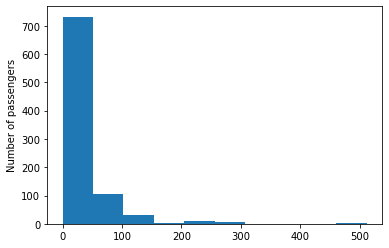

In [11]:
# plot in a a histogram
plt.figure()
plt.hist([train_data.Fare], align=('mid'))
plt.ylabel('Number of passengers')
plt.show()

There seems to be some odd fares (~500). This can be repared by setting it to a maximum based on the statistics of the dataset.

In this session, we won't go deeper into handling outliers of this kind. However, we want you to be aware of their existence :) 

#### 3.3. Imputting missing data

Now, we will look at how to handle missing data.

**Question 5. What do you think is a good idea to this end?**

**Spoiler Alert!!!! Do not read this further before answering the previous question.**

There are several ways to solving this problem. We organize them here in terms of their benefits:
* 1. Rely on information from additional sources to impute the data, e.g., Google. 
* 2. If no information is found, we can then rely on correlations among features to impute the data. For instance, we can rely on the Title and the place of boarding of a person to infer the cost of his ticket. 
* 3. If no relationships can be found, from an statistical perspective, the best option is to impute these values as the mean of the corresponding feature. For instance, assign the mean of the Age feature in the dataset to all missing values.
* 4. Delete features or data points with missing information. This method is **strongly discouraged** as it might delete a lot of information which may be useful for training. Only use in cases in which the imputation might produce more harm than benefits.

Let's try to assess correlations to impute missing values in our dataset:

**Important! Any value computation done on the test set must be solely computed based on information from the training set. Remember, in real life, you do not have the test set.**

In [12]:
print('Train data:\n', train_data.isna().sum(), '\n', f'\nDataset length:{len(train_data)} \n') # Isna() provides a True if the value is a NaN. With the sum function, we get the total per feature of these values.
print('Test data:\n', test_data.isna().sum(), f'\nDataset length:{len(test_data)} \n') # Isna() provides a True if the value is a NaN. With the sum function, we get the total per feature of these values.

Train data:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 
 
Dataset length:891 

Test data:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64 
Dataset length:418 



Note that the Cabin feature is missing almost everywhere (687 / 891 = 77.1% of the dataset). In such cases, it is a good idea to simply delete the feature. It is a pitty but imputing 77% of the dataset certainly calls into questioning its predictive power. 

In [20]:
imputed_train_data = train_data.drop(columns=['Cabin'])
print(imputed_train_data.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64


#### 3.3.1 Imputing 'Embarked'

We propose to impute the Embarked based on the Fare. To this end, we look at the mean Fare of people entering at each of the ports and use that value to impute the value of Embarked for the unknown persons:

In [8]:
print('Sites of embarking:', train_data.Embarked.dropna().unique())

# Let's get the mean fare by embarking place:
mean_S = train_data.loc[train_data.Embarked == 'S'].Fare.mean()
print("Mean Fare for people entering at 'S':", mean_S)

mean_C = train_data.loc[train_data.Embarked == 'C'].Fare.mean()
print("Mean Fare for people entering at 'C':",mean_C)

mean_Q = train_data.loc[train_data.Embarked == 'Q'].Fare.mean()
print("Mean Fare for people entering at 'Q':", mean_Q)

# Let's check which values are the most appropriate for the missing data:
train_data[train_data.Embarked.isna()]

Sites of embarking: ['S' 'C' 'Q']
Mean Fare for people entering at 'S': 27.07981180124218
Mean Fare for people entering at 'C': 59.95414404761905
Mean Fare for people entering at 'Q': 13.276029870129872


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Both have a Fare of '80'. Based on our imputation strategy, it seems that the most probable embarking place is 'C'.

In [39]:
imputed_train_data['Embarked'] = imputed_train_data['Embarked'].replace(np.nan, 'C')
imputed_train_data[train_data.Embarked.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,C
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,C


Done! 

**Question 6. Perhaps the previous strategy is not the best way to do this imputation. Propose a more reasonable alternative (No need to implement it).**


**Question 7. Come up with a reasonable way to impute the missing values in 'Age' and implement it.**<br>
(Hint) Use the previous code as a template and save the resulting dataset in imputed_train_data.<br>
(Hint) Insider information: Using the title of the persons to impute these values seems to be the best strategy. 

In [11]:
# Answer here
imputed_train_data = train_data

imputed_train_data.isna().sum() # The number of missing values should be zero!

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Question 8. Impute the test set values using the same strategy and put it on a variable called imputed_test_data.**<br>
**Important!** Remember! use only information from your train set. 

In [52]:
# Answer here

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


#### 3.4. Training your Machine Learning Model
We finally have a clean dataset with which we can work further. Before the real training, there is a final (and perhaps the most important) step to be done. We need to select the features we will use to predict!

#### 3.4.1. Feature Selection
Which features are relevant for the task at hand? We can use a correlation map to figure this out from data:

In [58]:
imputed_train_data.corr(method='pearson')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.031562,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.076673,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.317101,0.083081,0.018443,-0.549500
Age,0.031562,-0.076673,-0.317101,1.000000,-0.230486,-0.188181,0.083573
SibSp,-0.057527,-0.035322,0.083081,-0.230486,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.188181,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.083573,0.159651,0.216225,1.000000


In the Survived column, we can see the correlation of Survived with the rest of the features in the dataset. But something is odd.

**Question 9. What happened with the Name, Sex, Ticket, Embarked columns?**<br>
(Hint) Use Google to figure this out.

**Question 10. Compute and visualize the 'correlation' between these features and Survived.**<br>
(Hint) We have done this before ;). Note that some features, e.g., Name, must be processed further in order to obtain reasonable groups. For instance, the name of a person says nothing about he surviving. However, perhaps the Title does.

In [10]:
# Answer here

**Question 11. Based on the insights gotten in the previous section, select the features you believe most important to predict survival.**

For now, we consider the features shown below as optimal. Do note that this is not true!

In [62]:
features = ["Pclass", "Sex", "SibSp", "Parch"]

#### 3.4.2. Train your model.
Now, we are finally ready to train our model. We will here use a DecisionTree and a RandomForest, as they allow us to use categorical variables as well.

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix


# 1. Split the train data into a train and validation data.
y = train_data["Survived"]
X = pd.get_dummies(train_data[features]) #Creates dummy variables for categorical variables. Sex will be divided in 2 features: male, female. 

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42) #80% for training, 20% for validation.

# Decision Tree
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train, y_train)

# Random Forest
model_RF = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model_RF.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, random_state=1)

#### 4. Evaluate the resulting models

Now we trained a model. How can we know if the model is correct? Did it overfit? How good is our model in reality? We evaluate that next. 

#### 4.1. Decision Trees

In [104]:
# Analyze the results on the training and validation data.
print('Accuracy')
train_predictions = model_DT.predict(X_train)
acc_train = (train_predictions == y_train).sum() / len(y_train)
print(f'The accuracy of the model on the training set is: {acc_train}')

val_predictions = model_DT.predict(X_val)
acc_val = (val_predictions == y_val).sum() / len(y_val)
print(f'The accuracy of the model on the validation set is: {acc}')

Accuracy
The accuracy of the model on the training set is: 0.824438202247191
The accuracy of the model on the validation set is: 0.7988826815642458


Text(0.5, 1.0, 'Confusion Matrix (Validation Set)')

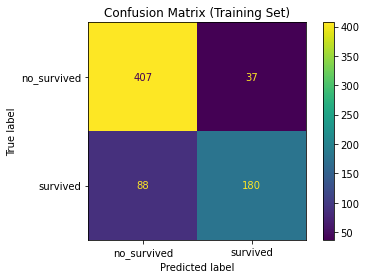

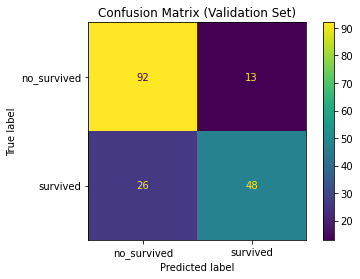

In [105]:
disp = plot_confusion_matrix(model_DT, X_train, y_train, display_labels=['no_survived', 'survived'])
disp.ax_.set_title('Confusion Matrix (Training Set)')

disp = plot_confusion_matrix(model_DT, X_val, y_val, display_labels=['no_survived', 'survived'])
disp.ax_.set_title('Confusion Matrix (Validation Set)')

#### 4.2. Random Forest

In [106]:
# Analyze the results on the training and validation data.
print('Accuracy')
train_predictions = model_RF.predict(X_train)
acc_train = (train_predictions == y_train).sum() / len(y_train)
print(f'The accuracy of the model on the training set is: {acc_train}')

val_predictions = model_RF.predict(X_val)
acc_val = (val_predictions == y_val).sum() / len(y_val)
print(f'The accuracy of the model on the validation set is: {acc}')

Accuracy
The accuracy of the model on the training set is: 0.8188202247191011
The accuracy of the model on the validation set is: 0.7988826815642458


Text(0.5, 1.0, 'Confusion Matrix (Validation Set)')

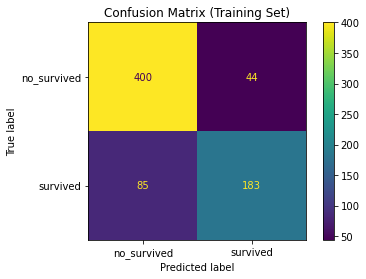

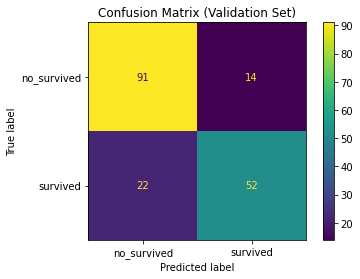

In [107]:
disp = plot_confusion_matrix(model_RF, X_train, y_train, display_labels=['no_survived', 'survived'])
disp.ax_.set_title('Confusion Matrix (Training Set)')

disp = plot_confusion_matrix(model_RF, X_val, y_val, display_labels=['no_survived', 'survived'])
disp.ax_.set_title('Confusion Matrix (Validation Set)')

#### 4.1. Feature Importance

A cool feature of Decision Trees and Random Forests is that we can asset the importance of the features used.

In [113]:
# These are the feature importances of each of the features used:

print('Decision Tree')
print(X_train)
print(model_DT.feature_importances_)


print('Random Forest')
print(X_train)
print(model_RF.feature_importances_)


Decision Tree
     Pclass  SibSp  Parch  Sex_female  Sex_male
331       1      0      0           0         1
733       2      0      0           0         1
382       3      0      0           0         1
704       3      1      0           0         1
813       3      4      2           1         0
..      ...    ...    ...         ...       ...
106       3      0      0           1         0
270       1      0      0           0         1
860       3      2      0           0         1
435       1      1      2           1         0
102       1      0      1           0         1

[712 rows x 5 columns]
[0.21822564 0.08984124 0.07513914 0.         0.61679398]
Random Forest
     Pclass  SibSp  Parch  Sex_female  Sex_male
331       1      0      0           0         1
733       2      0      0           0         1
382       3      0      0           0         1
704       3      1      0           0         1
813       3      4      2           1         0
..      ...    ...    ...  

**Question 12. Using the previous code, come up with a set of features and a model to classify survival as good as possible.**<br>
(Hint) You can do this by selecting, modifying or combining features. In addition, you can play with the parameters of the model as well.<br>
(Hint) You can use the importance of the features to select a more reasonable set of features for your model.
(Hint) Do you want to see how the decision tree looks like? Take a look at this blog:  https://scikit-learn.org/stable/modules/tree.html

**Question 13. Test! Retrain the model on the entire  training data and evaluate it on the real test set.**
(Hint) To evaluate the code on the real test dataset, run the subsequent code. It will generate a .csv file called **my_submission.csv**. That file should be uploaded in the Kaggle page: 
https://www.kaggle.com/c/titanic/leaderboard

In [114]:
predictions = model.predict(X_test) # model should be your final model.

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
